# 데이터 시각화 3주차 실습
- 데이터 - 지자체별 문화 예산 정보 (한국문화예술위원회)
## 시각화 내용
1.   Heatmap
2.   scatter plot



### 준비하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install squarify

In [3]:
import squarify

In [2]:
plt.rc('font', family='AppleGothic')

In [3]:
CHART_NAME = 'seabornTest'
cnt, PNG, UNDERBAR = 0, '.png', '_'

def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')
# end def FileSave():

### 데이터 불러오기

In [4]:
filename = '지자체별문화예산정보.csv'

df= pd.read_csv(filename, encoding='utf-8', index_col = 0 )

In [5]:
df

,FINAN_YEAR,ADMNSTMACH_CD,ADMNSTMACH_NM,TOT_ANEXPTR_BUDGET_PRICE,BEFORE_YEAR_ANEXPTR_BUDGET_PRICE,ANEXPTR_BUDGET_IRDS_RT,CLTUR_TURSM_BUDGET_PRICE,BEFORE_YEAR_CLTUR_TURSM_BUDGET_PRICE,CLTUR_TURSM_BUDGET_IRDS_RT,CLTUR_TURSM_BUDGET_RATE,TOT_POPLTN_CO,ONE_PSNBY_CLTUR_TURSM_BUDGET_PRICE
SEQ_NO,,,,,,,,,,,,
1,2016,1100000000,서울특별시,2.927279e+13,2.665722e+13,9.81,5.632196e+10,4.073831e+10,38.25,0.19,9857426,5714.0
2,2016,1111000000,서울특별시 종로구,4.323427e+11,4.126964e+11,4.76,3.850000e+08,4.800000e+07,702.08,0.09,152737,2521.0
3,2016,1114000000,서울특별시 중구,4.145856e+11,3.621207e+11,14.49,1.384890e+08,2.006800e+07,590.10,0.03,125249,1106.0
4,2016,1117000000,서울특별시 용산구,3.669454e+11,3.428220e+11,7.04,2.170000e+07,2.170000e+07,0.00,0.01,230241,94.0
5,2016,1120000000,서울특별시 성동구,4.167871e+11,3.916280e+11,6.42,4.600000e+07,4.600000e+07,0.00,0.01,299259,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,4886000000,경상남도 산청군,6.410598e+11,5.119109e+11,25.23,3.140200e+09,3.014622e+09,4.17,0.49,36098,86991.0
1701,2022,4887000000,경상남도 함양군,5.755567e+11,5.369389e+11,7.19,6.944940e+08,9.706260e+08,-28.45,0.12,40241,17258.0
1702,2022,4888000000,경상남도 거창군,8.519056e+11,8.299435e+11,2.65,3.005200e+08,2.485440e+08,20.91,0.04,63308,4747.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 1 to 1704
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   FINAN_YEAR                            1704 non-null   int64  
 1   ADMNSTMACH_CD                         1704 non-null   int64  
 2   ADMNSTMACH_NM                         1704 non-null   object 
 3   TOT_ANEXPTR_BUDGET_PRICE              1701 non-null   float64
 4   BEFORE_YEAR_ANEXPTR_BUDGET_PRICE      1701 non-null   float64
 5   ANEXPTR_BUDGET_IRDS_RT                1701 non-null   float64
 6   CLTUR_TURSM_BUDGET_PRICE              1701 non-null   float64
 7   BEFORE_YEAR_CLTUR_TURSM_BUDGET_PRICE  1701 non-null   float64
 8   CLTUR_TURSM_BUDGET_IRDS_RT            1647 non-null   float64
 9   CLTUR_TURSM_BUDGET_RATE               1701 non-null   float64
 10  TOT_POPLTN_CO                         1704 non-null   int64  
 11  ONE_PSNBY_CLTUR_T

In [7]:
df.columns = ['회계년도', '행정기관코드', '행정기관명', '총세출예산금액', '이전년도세출예산금액', '세출예산증감율', 
              '문화관광예산금액', '이전년도문화관광예산금액', '문화관광예산증감율', '문화관광예산비율',
              '총인구수', '1인당문화관광예산금액']

In [8]:
df

,회계년도,행정기관코드,행정기관명,총세출예산금액,이전년도세출예산금액,세출예산증감율,문화관광예산금액,이전년도문화관광예산금액,문화관광예산증감율,문화관광예산비율,총인구수,1인당문화관광예산금액
SEQ_NO,,,,,,,,,,,,
1,2016,1100000000,서울특별시,2.927279e+13,2.665722e+13,9.81,5.632196e+10,4.073831e+10,38.25,0.19,9857426,5714.0
2,2016,1111000000,서울특별시 종로구,4.323427e+11,4.126964e+11,4.76,3.850000e+08,4.800000e+07,702.08,0.09,152737,2521.0
3,2016,1114000000,서울특별시 중구,4.145856e+11,3.621207e+11,14.49,1.384890e+08,2.006800e+07,590.10,0.03,125249,1106.0
4,2016,1117000000,서울특별시 용산구,3.669454e+11,3.428220e+11,7.04,2.170000e+07,2.170000e+07,0.00,0.01,230241,94.0
5,2016,1120000000,서울특별시 성동구,4.167871e+11,3.916280e+11,6.42,4.600000e+07,4.600000e+07,0.00,0.01,299259,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,4886000000,경상남도 산청군,6.410598e+11,5.119109e+11,25.23,3.140200e+09,3.014622e+09,4.17,0.49,36098,86991.0
1701,2022,4887000000,경상남도 함양군,5.755567e+11,5.369389e+11,7.19,6.944940e+08,9.706260e+08,-28.45,0.12,40241,17258.0
1702,2022,4888000000,경상남도 거창군,8.519056e+11,8.299435e+11,2.65,3.005200e+08,2.485440e+08,20.91,0.04,63308,4747.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1704 entries, 1 to 1704
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   회계년도          1704 non-null   int64  
 1   행정기관코드        1704 non-null   int64  
 2   행정기관명         1704 non-null   object 
 3   총세출예산금액       1701 non-null   float64
 4   이전년도세출예산금액    1701 non-null   float64
 5   세출예산증감율       1701 non-null   float64
 6   문화관광예산금액      1701 non-null   float64
 7   이전년도문화관광예산금액  1701 non-null   float64
 8   문화관광예산증감율     1647 non-null   float64
 9   문화관광예산비율      1701 non-null   float64
 10  총인구수          1704 non-null   int64  
 11  1인당문화관광예산금액   1701 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 173.1+ KB


In [10]:
df.describe()

,회계년도,행정기관코드,총세출예산금액,이전년도세출예산금액,세출예산증감율,문화관광예산금액,이전년도문화관광예산금액,문화관광예산증감율,문화관광예산비율,총인구수,1인당문화관광예산금액
count,1704.000000,1.704000e+03,1.701000e+03,1.701000e+03,1701.000000,1.701000e+03,1.701000e+03,1647.000000,1701.000000,1.704000e+03,1701.000000
mean,2018.996479,3.750868e+09,1.424296e+12,1.309889e+12,9.042369,3.776337e+09,3.494851e+09,130.685149,0.241052,4.213810e+05,17638.746032
std,2.000584,1.158620e+09,3.536369e+12,3.241858e+12,7.959600,1.073771e+10,9.977372e+09,1242.245240,0.381225,1.122450e+06,34411.927341
min,2016.000000,1.100000e+09,1.360640e+11,1.251405e+11,-18.810000,0.000000e+00,0.000000e+00,-100.000000,0.000000,1.000100e+04,0.000000
25%,2017.000000,2.826000e+09,4.244581e+11,3.929248e+11,4.440000,2.306160e+08,1.993000e+08,-29.355000,0.040000,5.700500e+04,1272.000000
50%,2019.000000,4.223000e+09,5.993328e+11,5.499369e+11,8.530000,8.400000e+08,7.489600e+08,8.440000,0.120000,1.707880e+05,5711.000000
75%,2021.000000,4.671000e+09,9.735806e+11,8.940363e+11,12.540000,2.244900e+09,2.031630e+09,68.930000,0.290000,3.798920e+05,20170.000000
max,2022.000000,5.000000e+09,4.772111e+13,4.199913e+13,126.930000,1.201865e+11,9.901546e+10,45776.870000,3.740000,1.271678e+07,403771.000000


In [11]:
df_raw = df

### 실습

#### ChartData - 서울시 기준 2016 ~ 2022년 문화관광예산금액 차이 확인

In [24]:
df2 = df[['회계년도', '행정기관명', '문화관광예산금액']]

In [25]:
df2

,회계년도,행정기관명,문화관광예산금액
SEQ_NO,,,
1,2016,서울특별시,5.632196e+10
2,2016,서울특별시 종로구,3.850000e+08
3,2016,서울특별시 중구,1.384890e+08
4,2016,서울특별시 용산구,2.170000e+07
5,2016,서울특별시 성동구,4.600000e+07
...,...,...,...
1700,2022,경상남도 산청군,3.140200e+09
1701,2022,경상남도 함양군,6.944940e+08
1702,2022,경상남도 거창군,3.005200e+08


In [26]:
print(df2.columns)

Index(['회계년도', '행정기관명', '문화관광예산금액'], dtype='object')


In [27]:
dff = df2[(df2['행정기관명'] == '서울특별시')]  

In [28]:
dff.set_index('회계년도', inplace = True)

In [29]:
chartdata = dff[['문화관광예산금액']]

In [30]:
.YTICKS_INTERVAL = 50000
maxlim = (int(chartdata.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
plt.plot(chartdata, color='gray', linestyle='solid', marker='o')
values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
plt.grid(True)
plt.xlabel('년도')
plt.ylabel("문화관광예산금액")
plt.title('2016~2022년 서울시 문화관광예산금액')

SyntaxError: invalid syntax (465467397.py, line 1)

그래프 통해 알 수 있는 것
- 점진적으로 예산이 증가했다

#### ChartData - 광역자치단체별 2016 ~ 2022년 문화관광예산금액 차이 확인

In [31]:
df3 = df2

In [32]:
df3.set_index('회계년도', inplace = True)

In [23]:
df3

,행정기관명,문화관광예산금액
회계년도,,
2016,서울특별시,5.632196e+10
2016,서울특별시 종로구,3.850000e+08
2016,서울특별시 중구,1.384890e+08
2016,서울특별시 용산구,2.170000e+07
2016,서울특별시 성동구,4.600000e+07
...,...,...
2022,경상남도 산청군,3.140200e+09
2022,경상남도 함양군,6.944940e+08
2022,경상남도 거창군,3.005200e+08


In [24]:
df3['행정기관명'].value_counts()

서울특별시          7
충청남도 당진시       7
충청남도 부여군       7
충청남도 서천군       7
충청남도 청양군       7
              ..
경기도 부천시        7
경기도 광명시        7
경기도 용인시 처인구    1
경기도 용인시 기흥구    1
경기도 용인시 수지구    1
Name: 행정기관명, Length: 246, dtype: int64

In [25]:
data1 = df3[(df3['행정기관명'] == '서울특별시')]
seoul = data1[['문화관광예산금액']]
seoul.rename(columns = {'문화관광예산금액':'서울특별시'}, inplace = True)

data2 = df3[(df3['행정기관명'] == '경기도')]
ggi = data2[['문화관광예산금액']]
ggi.rename(columns = {'문화관광예산금액':'경기도'}, inplace = True)

data3 = df3[(df3['행정기관명'] == '인천광역시')]
ich = data3[['문화관광예산금액']]
ich.rename(columns = {'문화관광예산금액':'인천광역시'}, inplace = True)

data4 = df3[(df3['행정기관명'] == '부산광역시')]
busan = data4[['문화관광예산금액']]
busan.rename(columns = {'문화관광예산금액':'부산광역시'}, inplace = True)

data5 = df3[(df3['행정기관명'] == '울산광역시')]
ulsan = data5[['문화관광예산금액']]
ulsan.rename(columns = {'문화관광예산금액':'울산광역시'}, inplace = True)

data6 = df3[(df3['행정기관명'] == '대전광역시')]
daejeon = data6[['문화관광예산금액']]
daejeon.rename(columns = {'문화관광예산금액':'대전광역시'}, inplace = True)

data7 = df3[(df3['행정기관명'] == '세종특별자치시')]
saejong = data7[['문화관광예산금액']]
saejong.rename(columns = {'문화관광예산금액':'세종특별자치시'}, inplace = True)

data8 = df3[(df3['행정기관명'] == '제주특별자치도')]
jeju = data8[['문화관광예산금액']]
jeju.rename(columns = {'문화관광예산금액':'제주특별자치도'}, inplace = True)

data9 = df3[(df3['행정기관명'] == '전라북도')]
jeonup = data9[['문화관광예산금액']]
jeonup.rename(columns = {'문화관광예산금액':'전라북도'}, inplace = True)

data10 = df3[(df3['행정기관명'] == '전라남도')]
jeondown = data10[['문화관광예산금액']]
jeondown.rename(columns = {'문화관광예산금액':'전라남도'}, inplace = True)

data11 = df3[(df3['행정기관명'] == '충청북도')]
chungup = data11[['문화관광예산금액']]
chungup.rename(columns = {'문화관광예산금액': '충청북도'}, inplace = True)

data12 = df3[(df3['행정기관명'] == '충청남도')]
chungdown = data12[['문화관광예산금액']]
chungdown.rename(columns = {'문화관광예산금액':'충청남도'}, inplace = True)

data13 = df3[(df3['행정기관명'] == '경상북도')]
sangup = data13[['문화관광예산금액']]
sangup.rename(columns = {'문화관광예산금액':'경상북도'}, inplace = True)

data14 = df3[(df3['행정기관명'] == '경상남도')]
sangdown = data14[['문화관광예산금액']]
sangdown.rename(columns = {'문화관광예산금액':'경상남도'}, inplace = True)

/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2521/2141914709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul.rename(columns = {'문화관광예산금액':'서울특별시'}, inplace = True)
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2521/2141914709.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ggi.rename(columns = {'문화관광예산금액':'경기도'}, inplace = True)
/var/folders/78/c0mtglkd01qdvrc3g3x19nsc0000gn/T/ipykernel_2521/2141914709.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [26]:
chartdata_1 = pd.concat([seoul, ggi, ich, busan, ulsan, daejeon, saejong,  jeju, jeonup , jeondown ,chungup, chungdown, sangup, sangdown], axis = 1)

In [27]:
chartdata_1

,서울특별시,경기도,인천광역시,부산광역시,울산광역시,대전광역시,세종특별자치시,제주특별자치도,전라북도,전라남도,충청북도,충청남도,경상북도,경상남도
회계년도,,,,,,,,,,,,,,
2016,5.632196e+10,3.450902e+10,7.869613e+09,1.781631e+10,5.323460e+09,2.762162e+09,1.279812e+09,2.051398e+10,3.009368e+10,4.105088e+10,1.809895e+10,4.538388e+10,7.714136e+10,2.962200e+10
2017,7.737316e+10,4.198249e+10,6.052569e+09,2.536883e+10,5.168040e+09,2.106050e+09,8.584000e+08,1.918730e+10,3.420161e+10,3.187910e+10,1.023331e+10,7.297103e+10,7.089874e+10,2.862087e+10
2018,7.776225e+10,4.777519e+10,7.975046e+09,9.410063e+09,3.975404e+09,2.586896e+09,2.966040e+09,1.646130e+10,3.867053e+10,4.149463e+10,1.283309e+10,5.433073e+10,5.297986e+10,2.942477e+10
2019,8.042692e+10,5.028548e+10,8.310851e+09,1.041776e+10,9.719196e+09,3.179646e+09,1.256905e+09,2.020796e+10,4.326080e+10,5.101055e+10,9.733382e+09,5.089513e+10,7.315984e+10,4.707337e+10
2020,9.901546e+10,8.065619e+10,4.112777e+09,9.306708e+09,1.257261e+10,5.998566e+09,2.984560e+09,1.998370e+10,3.734750e+10,5.065519e+10,1.818891e+10,5.883177e+10,6.950486e+10,6.226533e+10
2021,9.451890e+10,6.461281e+10,5.384254e+09,1.055062e+10,1.112559e+10,9.675435e+09,4.902279e+09,1.746706e+10,4.857377e+10,4.330819e+10,2.174778e+10,6.955230e+10,7.461488e+10,6.631225e+10
2022,1.201865e+11,6.193113e+10,7.224508e+09,1.733341e+10,1.223476e+10,3.211537e+09,1.949688e+09,1.851360e+10,6.727885e+10,4.612785e+10,1.740631e+10,6.964873e+10,7.142352e+10,4.706161e+10


Text(0.5, 1.0, '광역자치단체별 2016 ~ 2022년 문화관광예산금액')

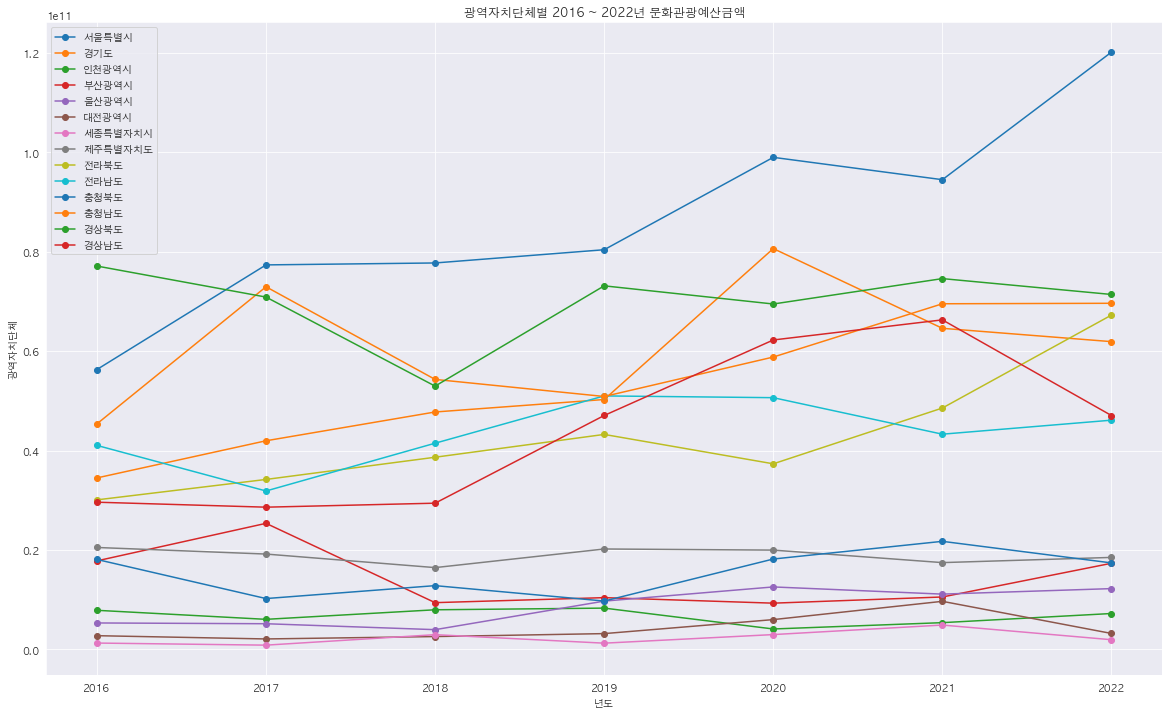

In [28]:
chartdata_1.plot(title='SomeTitie', figsize=(20,12), legend = True, marker='o', rot=0)
plt.grid(True)
plt.xlabel('년도')
plt.ylabel('광역자치단체')
plt.title('광역자치단체별 2016 ~ 2022년 문화관광예산금액')

#### 지자채별 2022년 문화관광예산현황 차트

In [31]:
chartdata_2 = chartdata_1.T

In [32]:
chartdata_2

회계년도,2016,2017,2018,2019,2020,2021,2022
서울특별시,5.632196e+10,7.737316e+10,7.776225e+10,8.042692e+10,9.901546e+10,9.451890e+10,1.201865e+11
경기도,3.450902e+10,4.198249e+10,4.777519e+10,5.028548e+10,8.065619e+10,6.461281e+10,6.193113e+10
인천광역시,7.869613e+09,6.052569e+09,7.975046e+09,8.310851e+09,4.112777e+09,5.384254e+09,7.224508e+09
부산광역시,1.781631e+10,2.536883e+10,9.410063e+09,1.041776e+10,9.306708e+09,1.055062e+10,1.733341e+10
울산광역시,5.323460e+09,5.168040e+09,3.975404e+09,9.719196e+09,1.257261e+10,1.112559e+10,1.223476e+10
대전광역시,2.762162e+09,2.106050e+09,2.586896e+09,3.179646e+09,5.998566e+09,9.675435e+09,3.211537e+09
세종특별자치시,1.279812e+09,8.584000e+08,2.966040e+09,1.256905e+09,2.984560e+09,4.902279e+09,1.949688e+09
제주특별자치도,2.051398e+10,1.918730e+10,1.646130e+10,2.020796e+10,1.998370e+10,1.746706e+10,1.851360e+10
전라북도,3.009368e+10,3.420161e+10,3.867053e+10,4.326080e+10,3.734750e+10,4.857377e+10,6.727885e+10
전라남도,4.105088e+10,3.187910e+10,4.149463e+10,5.101055e+10,5.065519e+10,4.330819e+10,4.612785e+10


In [34]:
chartdata = chartdata_2[[2022]]

In [51]:
chartdata

회계년도,2022
서울특별시,1.201865e+11
경기도,6.193113e+10
인천광역시,7.224508e+09
부산광역시,1.733341e+10
울산광역시,1.223476e+10
대전광역시,3.211537e+09
세종특별자치시,1.949688e+09
제주특별자치도,1.851360e+10
전라북도,6.727885e+10
전라남도,4.612785e+10


In [46]:
len(chartdata.index)

14

In [52]:
# plt.bar() 메소드를 사용한 막대 그래프
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure()
    plt.bar(x, y, color=color, alpha=0.7) # bar plot 여기서 지정

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.grid(True)

    YTICKS_INTERVAL = 50000

    maxlim = (int(y.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
    print(maxlim)

    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)

    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum()
    print(ratio)


    plt.rc('font', size=6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '건'  # 예시 : 60건
        ratioval = '%.1f%%' % (ratio[idx])  # 예시 : 20.0%
        # 그래프의 위에 "건수" 표시
        plt.text(x=idx, y=y[idx] + 1, s=value, horizontalalignment='center')
        # 그래프의 중간에 비율 표시
        plt.text(x=idx, y=y[idx] / 2, s=ratioval, horizontalalignment='center')

    # 평균 값을 수평선으로 그리기
    meanval = y.mean()
    print(meanval)

    average = '평균 : %d건' % meanval
    plt.axhline(y=meanval, color='r', linewidth=1, linestyle='dashed')
    plt.text(x=y.size - 1, y=meanval + 200, s=average, horizontalalignment='center')

# def MakeBarChart01

In [53]:
colors = ['#FFC312', '#F79F1F', '#EE5A24', '#EA2027',
          '#ED4C67', '#B53471', '#833471', '#6F1E51',
          '#9980FA', '#5758BB', '#12CBC4', '#1289A7',
          '#0652DD', '#833471', '#C4E538', '#A3CB38',
          '#009432', '#006266']
mycolor = colors[0:len(chartdata)]

In [ ]:
MakeBarChart01(x=chartdata.index, y=chartdata, color=mycolor, xlabel='지방자치단체',
               ylabel='문화관광예산현황', title='2022년 지방자치단체별 문화관광예산현황')

120186500000


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f8dc9bb6820> (for post_execute):
